<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G3
#### Team: 6
#### Members:
1. Benedict Lee
2. Lim Zi Fei Claire
3. Grace Angel Bisawan
4. Chua Yue Heng
5. Tan Hong Xun Zachary

#### Dataset: Climate

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 

In [1]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Store climate.csv into a dataframe
df = pd.read_csv('climate.csv')
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
3,1983,8,1.130,NaN,1631.35,L,193.602,355.633,M,H,0.176
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149


The dataset contains categorical and numerical data that is linked to climate and its atmospheric properties. The data can be used to examine the consequences of various factors on average global temperature, as well as to uncover crucial insights and information on how it can affect climate change.

**b.** State the size of the dataset

**Response.** 

In [2]:
#Finding the number of rows and columns of the dataset
n_rows, n_cols = df.shape
print(f"# of rows: {n_rows}")
print(f"# of columns: {n_cols}")

# of rows: 308
# of columns: 11


There are 308 rows and 11 columns in this dataset.

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

In [3]:
#Printing datatype of each variable
df.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O          object
CFC-11      float64
CFC-12      float64
TSI          object
Aerosols     object
Temp        float64
dtype: object

|Name|Description|Category|Details|
|:---|:---|:---|:---|
|Year| Year of observation | Categorical | |
|Month| Month of observation | Categorical | |
|MEI| Multivariate El Nino Southern Oscillation index (MEI) | Numerical | A measure of the strength of the El Nino/La Nina-Southern Oscillation |
|CO2| Atmospheric concentration of carbon dioxide | Numerical | Measured in parts per million by volume |
|CH4| Atmospheric concentration of methane | Numerical | Measured in parts per million by volume |
|N2O| Level of atmospheric concentration of nitrous oxide  | Categorical | Possible values: “H”, “L” |
|CFC-11| Atmospheric concentration of trichlorofluoromethane | Numerical | Measured in parts per billion by volume |
|CFC-12| Atmospheric concentration of dichlorodifluoromethane | Numerical | Measured in parts per billion by volume |
|TSI| Level of Total Solar Irradiance. TSI is the rate at which sun's energy is deposited per unit area | Categorical | Possible values: “H”, “M”, “L” |
|Aerosols| Level of stratospheric “aerosol optical depth” at 550nm. This is linked to volcanoes, as eruptions result in new particles added to atmosphere | Categorical | Possible values: “H”, “M”, “L” |
|Temp| Difference in temperature between average global temperature and a reference value | Numerical | |

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

Before dealing with missing data, we realised that some of the data for the column Month is incorrect (not in the right ascending order from 1-12). We identified the erroneous columns and corrected them.

In [4]:
#Checks which rows of data has the wrong month
#Each row of data should have a cumulative difference of either +1 or -11
df.Month.diff()[lambda n: (n!=1) & (n!=-11)][1:]

60   -3.0
61    5.0
75   -6.0
76    8.0
Name: Month, dtype: float64

In [5]:
#Rows of data that have the incorrect month are corrected
series = df.Month.diff()[lambda n: (n!=1) & (n!=-11)][1:]

for idx, diff in series.items():
  if idx+1 in series.index:
    df.Month.at[idx] = 1 if df.Month.at[idx-1] >= 12 else df.Month.at[idx-1] + 1

In [6]:
#Checking if all the months are corrected
df.Month.diff()[lambda n: (n!=1) & (n!=-11)][1:]

Series([], Name: Month, dtype: float64)

In [7]:
round(df.isnull().sum() / df.shape[0] * 100, 2)

Year        0.00
Month       0.00
MEI         0.00
CO2         6.49
CH4         0.00
N2O         0.00
CFC-11      0.00
CFC-12      0.00
TSI         6.17
Aerosols    0.00
Temp        0.00
dtype: float64

There is 6.49% of missing data in the CO2 column, and 6.17% of missing data in the TSI column. 

For the CO2 column, we are able to observe a constantly increasing trend. Since it is highly unlikely that there will be spikes in CO2, we choose to interpolate the data. 

For the TSI column, we are unable to observe a trend for the categorical data. We do not have specific domain knowledge or insight available to predict the trend, hence we will opt to drop the data. 

In [8]:
df.interpolate(inplace=True) # interpolate
df = df.round({"CO2": 2}) # rounds CO2 to 2 d.p.
df.dropna(inplace=True) # drops all NA values
df.reset_index(drop=True, inplace=True) # resets index
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
3,1983,8,1.130,342.16,1631.35,L,193.602,355.633,M,H,0.176
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149
...,...,...,...,...,...,...,...,...,...,...,...
284,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407
285,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378
286,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440
287,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394


**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

<BarContainer object of 120 artists>

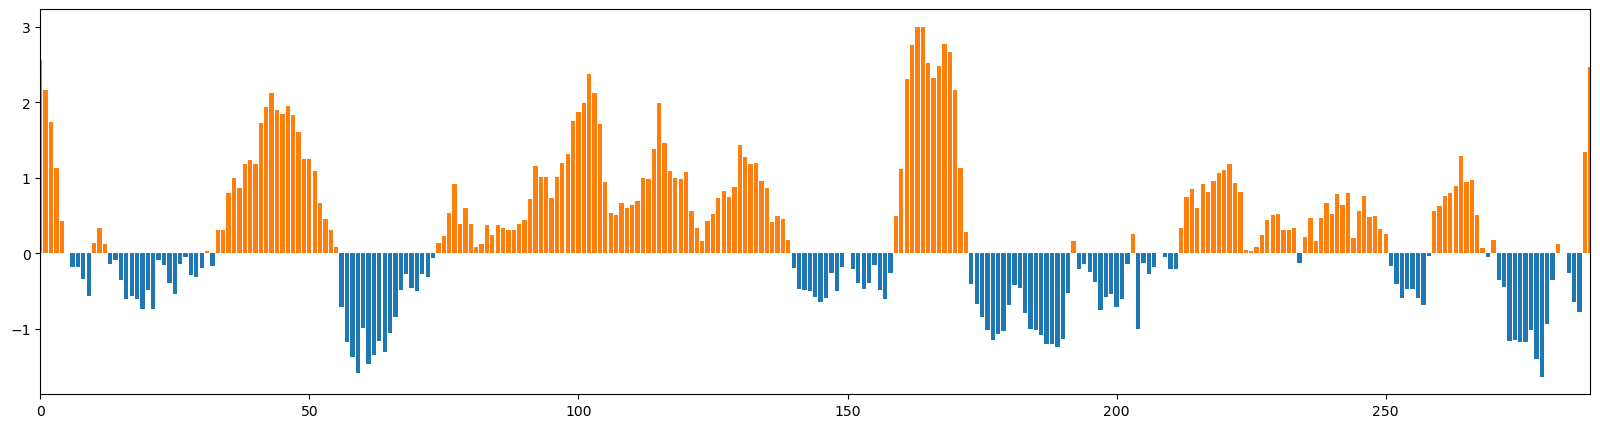

In [9]:
# Plotting MEI variable on bar chart
plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())

mask = (df.MEI > 0)

plt.bar(df.index[mask], df.MEI[mask], color='C1')
plt.bar(df.index[~mask], df.MEI[~mask], color='C0')

MEI:
As the MEI contains both negative and positive values over the years, we decided that a bar chart would be ideal to visualise the spread of data.

Based on the plotted chart, we are able to tell at a glance how the MEI fluctuates over the years. There do not appear to be any outliers.

Text(0, 0.5, 'CO2 Level')

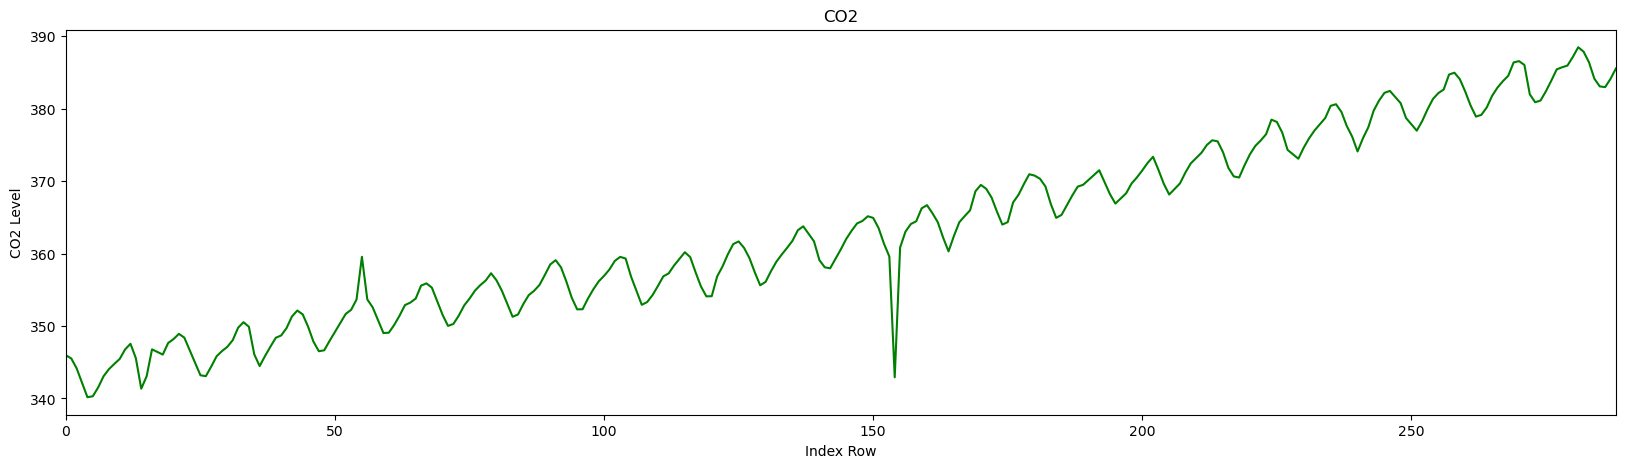

In [10]:
# Plotting line chart for CO2 variable

plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())

plt.plot(df.index, df.CO2, 'green')

plt.title("CO2")
plt.xlabel("Index Row")
plt.ylabel("CO2 Level")

CO2: As the CO2 values adopts an increasing pattern over the years, we decided that a line chart would be best in both representing the increase in CO2 levels over the years as well as identifying potential outliers.

Based on the line chart we plotted, we are able to observe an fluctuating uptrend in CO2 levels as the year increases. We are also able to tell at a glance that there are outliers present in the numerical variable. 
Upon further inspection, we can tell that the outlier lies between the index range of 150-160.

Text(0, 0.5, 'CH4 Level')

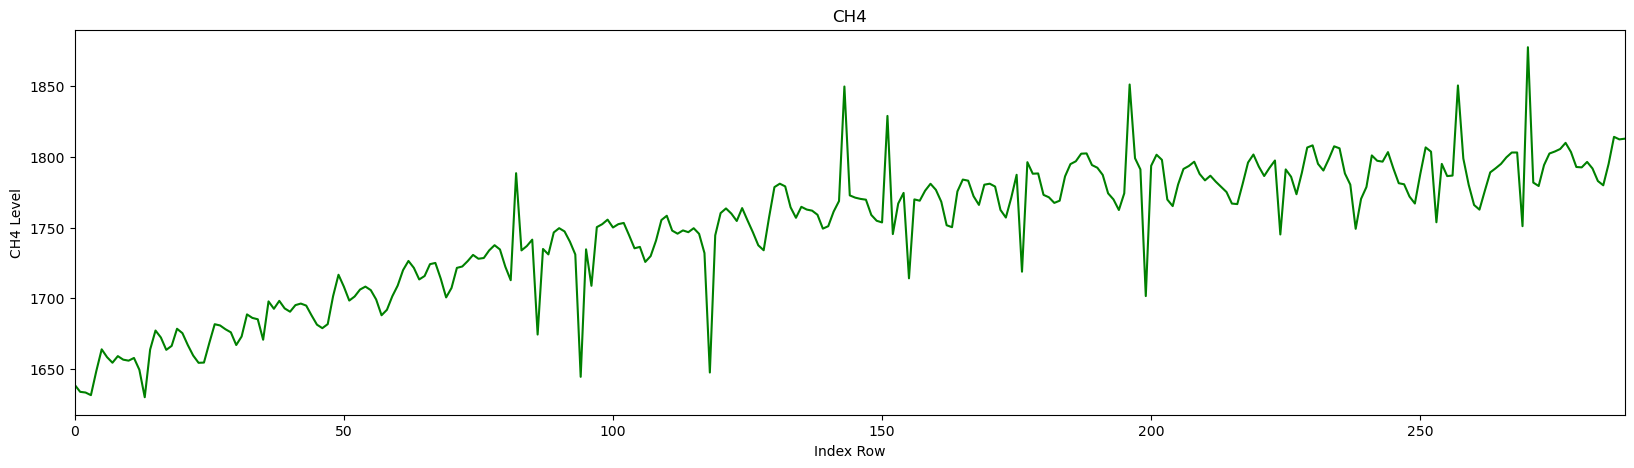

In [11]:
# Plotting line chart for CH4 variable

plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())

plt.plot(df.index, df.CH4, 'green')

plt.title("CH4")
plt.xlabel("Index Row")
plt.ylabel("CH4 Level")

CH4: We plotted a line chart to observe the levels of CH4 over the years. The level of CH4 has generally been increasing, and even though there have been multiple spikes, the level of CH4 generally remains in the range of 1600 - 1900. We determine that there are no outliers in this particular numerical variable.

Text(0, 0.5, 'CFC-11 Level')

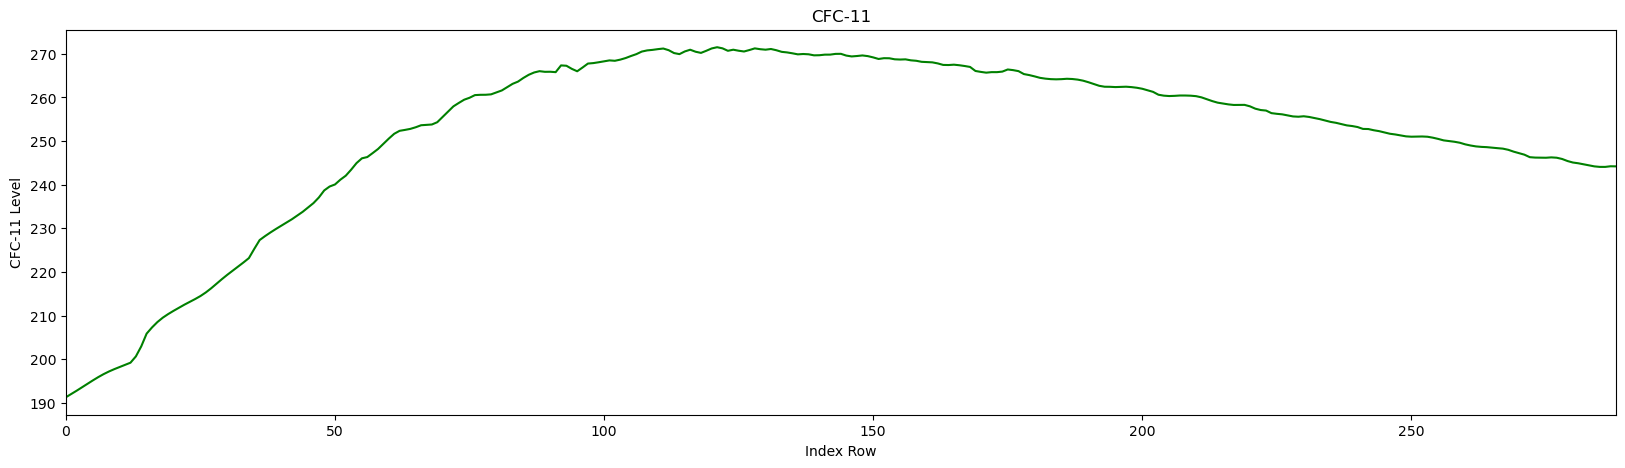

In [12]:
# Plotting line chart for CFC-11 variable

plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())

plt.plot(df.index, df["CFC-11"], 'green')

plt.title("CFC-11")
plt.xlabel("Index Row")
plt.ylabel("CFC-11 Level")

CFC-11: We plotted a line chart to represent the CFC-11 levels over the years, and realised that the CFC-11 values follow a smooth curve. We are able to observe that the rate of increase of CFC-11 has been steadily decreasing. As there are no sudden deviations from the curve, We are able to conclude that there are no outliers in this numerical variable.

Text(0, 0.5, 'CFC-12 Level')

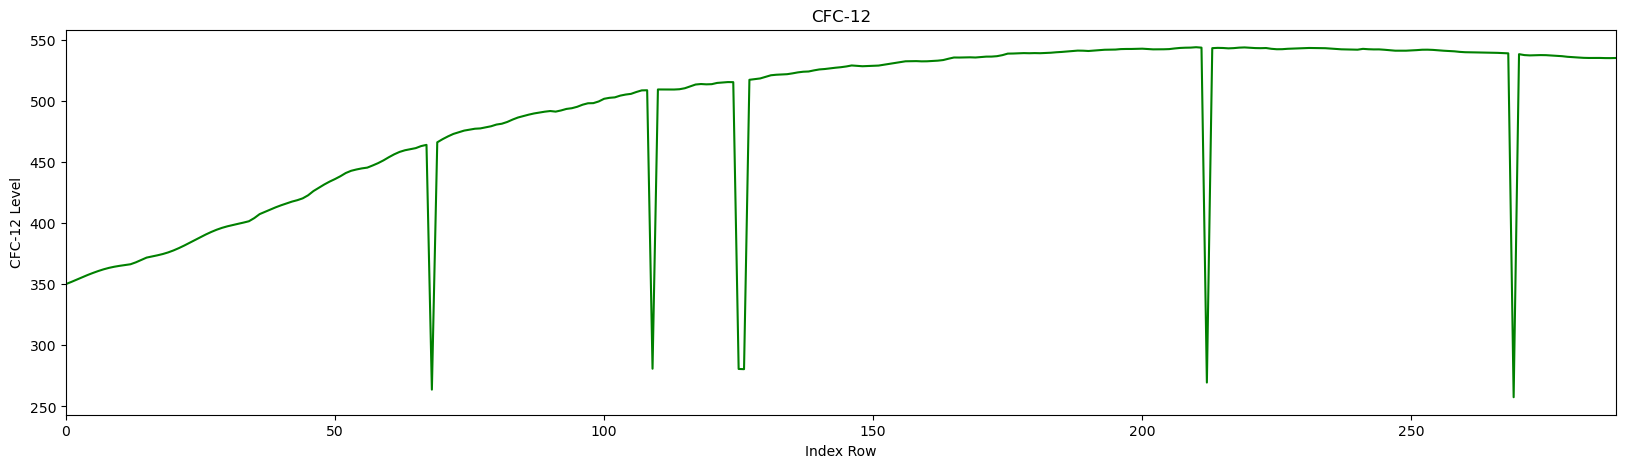

In [13]:
# Plotting line chart for CFC-12 variable

plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())
# plt.bar(df.index,df["CFC-12"])

plt.plot(df.index, df["CFC-12"], 'green')

plt.title("CFC-12")
plt.xlabel("Index Row")
plt.ylabel("CFC-12 Level")

CFC-12: Similarly to CFC-11, we also plotted a line chart to represent the CFC-12 levels over the years. We are also able to tell that there are multiple outliers in this numerical variable. However, in general the distribution of CFC-12 follows a smooth curve.

<BarContainer object of 21 artists>

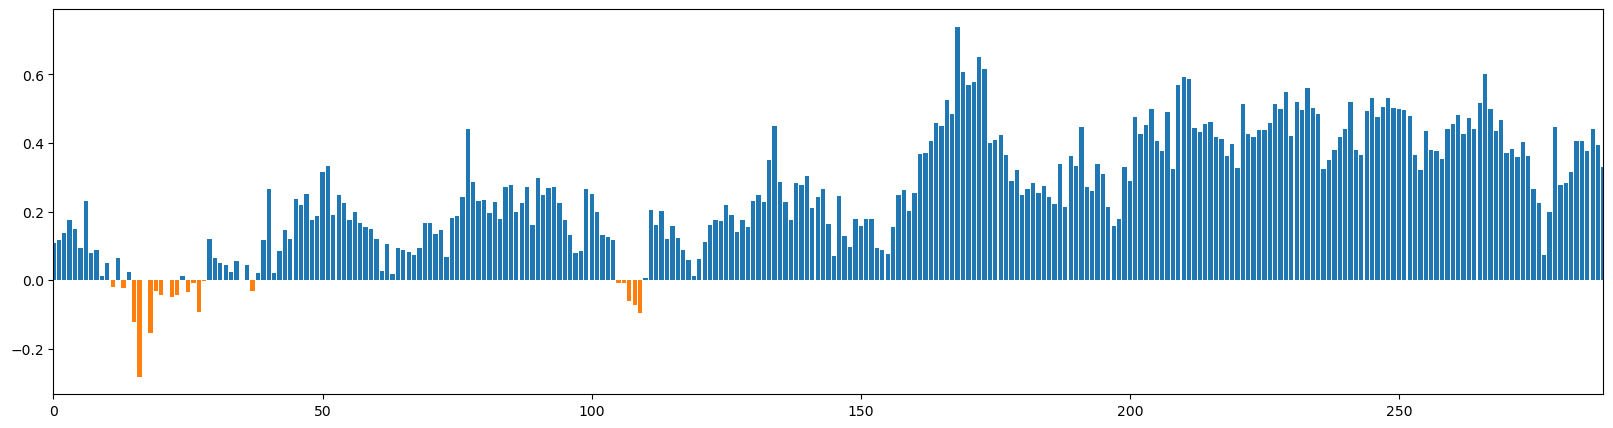

In [14]:
# Plotting bar chart for Temp variable

plt.figure(figsize=(20,5))
plt.xlim(0,df.index.max())
# plt.bar(df.index,df["Temp"])

mask = (df.Temp > 0)

plt.bar(df.index[df.Temp > 0], df.Temp[df.Temp > 0], color='C0')
plt.bar(df.index[df.Temp < 0], df.Temp[df.Temp < 0], color='C1')

Temperature:
As the Temp variable measures the difference in temperature between average global temperature and a reference value, it contains both negative and positive values over the years. Hence, we decided that a bar chart would be ideal to visualise the spread.

Based on the plotted chart, we are able to tell that the majority of years have a higher temperature than the reference value, and temperature seems to follow an increasing trend over the years. There are only a few years where the temperature dips below the reference value. 

Accordingly, we are able to determine that there are no outliers based on the plotted bar chart.

In [15]:
# Dropping outliers for CFC-12 and CO2 variables

df.drop(df[df["CFC-12"] < 300].index, inplace=True)

CO2_series = df['CO2'][140:160]
for idx, value in CO2_series.items():
    if (value < 350):
        df.drop(idx, inplace=True)
        
# Drop NA values and reset index taking into account the dropped values 
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'CFC-12')

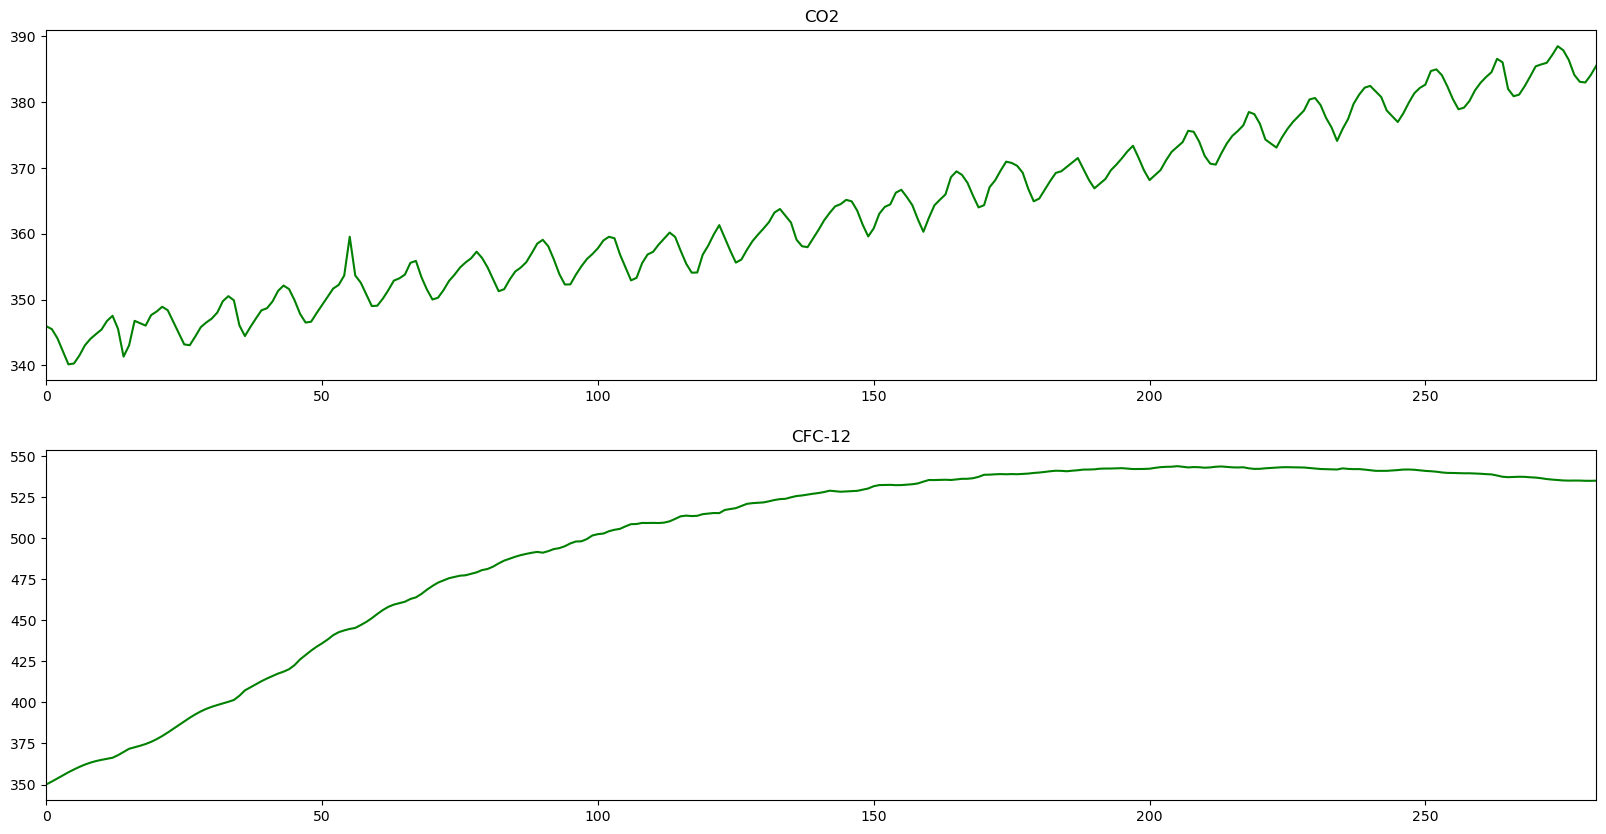

In [16]:
# Generating CO2 and CFC-12 charts after removing outliers

fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].set_xlim(0,df.index.max())
ax[1].set_xlim(0,df.index.max())

ax[0].plot(df.index, df.CO2, 'green')
ax[1].plot(df.index, df["CFC-12"], 'green')

ax[0].set_title("CO2")
ax[1].set_title("CFC-12")

**c.** For categorical variables, perform the necessary encoding.

**Response.** 

For the categorical variables N2O, TSI and Aerosol we perform encoding.

Since N2O only takes the values H and L, we determine it is sufficient to map these two values to 1 and 0 respectively.

TSI and Aerosols however take the values H, M and L, hence we map these values to 2, 1 and 0 respectively. We decided to use ordinal encoding on these values as we believe that assigning a bigger value to H and a smaller value to L, can provide more context to the data.

In [17]:
# Encoding categorical variables (N2O, TSI, Aerosol)

# encode N2O to 1 and 0
encoding = {"H":1, "L":0}
df["N2O_Encoded"] = df["N2O"].map(encoding)

# encode TSI and Aerosols to 2, 1 and 0
LMH_encoding = {"H":2, "M": 1, "L":0}
df["TSI_Encoded"] = df["TSI"].map(LMH_encoding)
df["Aerosols_Encoded"] = df["Aerosols"].map(LMH_encoding)

# Drop categorical columns N2O, TSI and Aerosols
df.drop(columns=["N2O","TSI","Aerosols"], inplace=True)

df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,N2O_Encoded,TSI_Encoded,Aerosols_Encoded
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,0,1,2
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,0,1,2
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,0,1,2
3,1983,8,1.130,342.16,1631.35,L,193.602,355.633,M,H,0.176,0,1,2
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407,0,0,0
278,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378,0,0,1
279,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440,0,0,1
280,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              282 non-null    int64  
 1   Month             282 non-null    int64  
 2   MEI               282 non-null    float64
 3   CO2               282 non-null    float64
 4   CH4               282 non-null    float64
 5   N2O               282 non-null    object 
 6   CFC-11            282 non-null    float64
 7   CFC-12            282 non-null    float64
 8   TSI               282 non-null    object 
 9   Aerosols          282 non-null    object 
 10  Temp              282 non-null    float64
 11  N2O_Encoded       282 non-null    int64  
 12  TSI_Encoded       282 non-null    int64  
 13  Aerosols_Encoded  282 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 31.0+ KB


### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.** 

We first present the summary of numerical variables in the dataset, followed by categorical variables.

In [19]:
df.iloc[:,2:-3].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEI,282.0,0.288851,0.955037,-1.635,-0.43500,0.2410,0.88900,3.001
CO2,282.0,363.234397,12.648806,340.170,352.96000,361.7350,373.62500,388.500
CH4,282.0,1748.876773,48.463863,1629.890,1715.90250,1761.6000,1787.11500,1877.610
CFC-11,282.0,251.911816,20.064542,191.324,246.22575,258.2715,266.76950,271.494
CFC-12,282.0,497.179493,57.563523,350.113,471.40825,527.7765,540.42000,543.813
Temp,282.0,0.258670,0.175628,-0.282,0.13225,0.2480,0.40575,0.739


In [20]:
#N2O
df['N2O_Encoded'].value_counts()

0    274
1      8
Name: N2O_Encoded, dtype: int64

In [21]:
#TSI
df['TSI_Encoded'].value_counts()

1    146
0     86
2     50
Name: TSI_Encoded, dtype: int64

In [22]:
#Aerosols
df['Aerosols_Encoded'].value_counts()

1    135
0    100
2     47
Name: Aerosols_Encoded, dtype: int64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

We choose to use histograms to easily depict the distribution of the various values. 


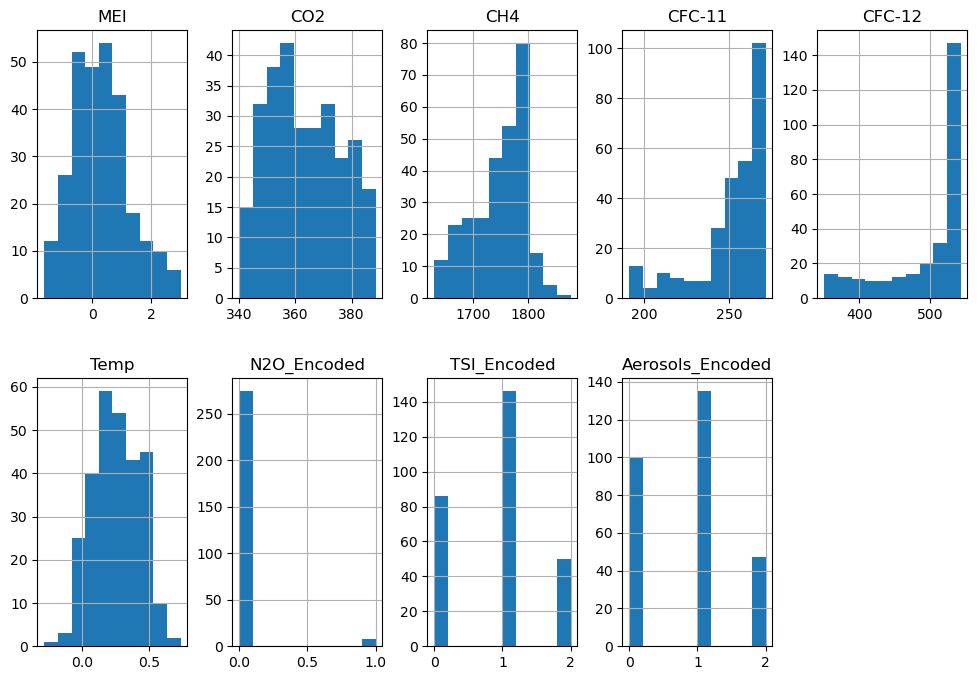

In [23]:
#histograms for all values
df_numerics = df[["MEI","CO2","CH4","CFC-11","CFC-12","Temp", "N2O_Encoded", "TSI_Encoded", "Aerosols_Encoded"]]
df_numerics.hist(layout=(2, 5), figsize=(12, 8))
plt.show()

NameError: name 'df' is not defined

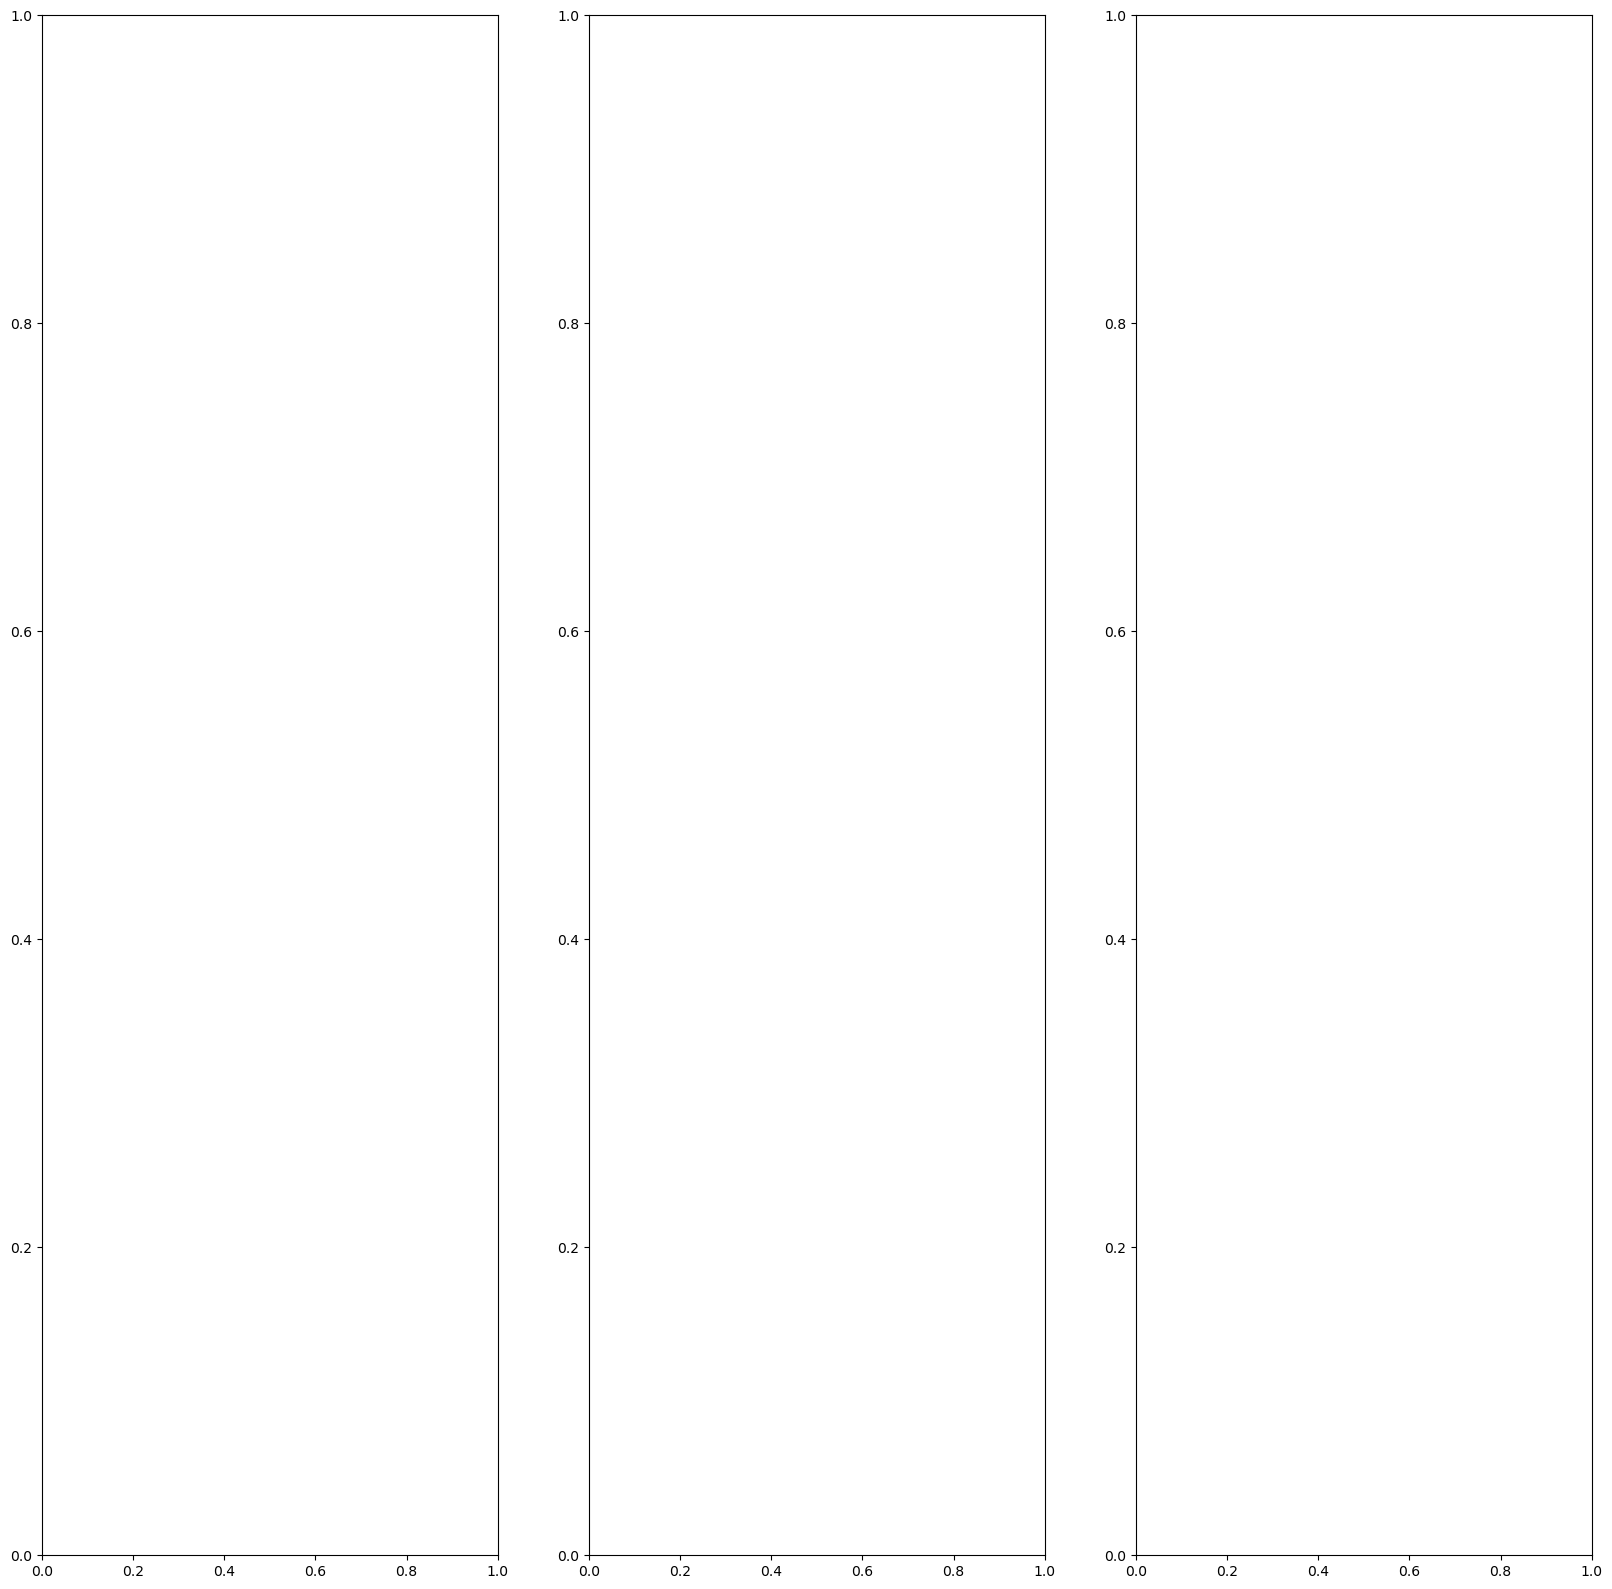

In [2]:
#pie charts for categorical variables
fig, axs = plt.subplots(1, 3, figsize=(20,20))

axs[0].pie(df["N2O_Encoded"].value_counts(), labels = (0 ,1), autopct='%1.0f%%')
axs[1].pie(df["TSI_Encoded"].value_counts(), labels = (0, 1, 2), autopct='%1.0f%%')
axs[2].pie(df["Aerosols_Encoded"].value_counts(), labels = (0, 1, 2), autopct='%1.0f%%')
axs[0].set_title("N2O")
axs[1].set_title("TSI")
axs[2].set_title("Aerosol")
axs[0].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[1].legend(bbox_to_anchor=(1, 0, 0.25, 1))
axs[2].legend(bbox_to_anchor=(1, 0, 0.25, 1))

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

In [25]:
#creating new variable Date derived from Year and Month
df["date"] = df["Year"] + (df["Month"] - 1) / 12
df.drop(["Year","Month"],axis=1,inplace=True)
df["date"]

0      1983.333333
1      1983.416667
2      1983.500000
3      1983.583333
4      1983.666667
          ...     
277    2008.583333
278    2008.666667
279    2008.750000
280    2008.833333
281    2008.916667
Name: date, Length: 282, dtype: float64

To allow for easier bivariate comparison between date and our numerical variables, we decided to make a new variable Date derived from Year and Month. 

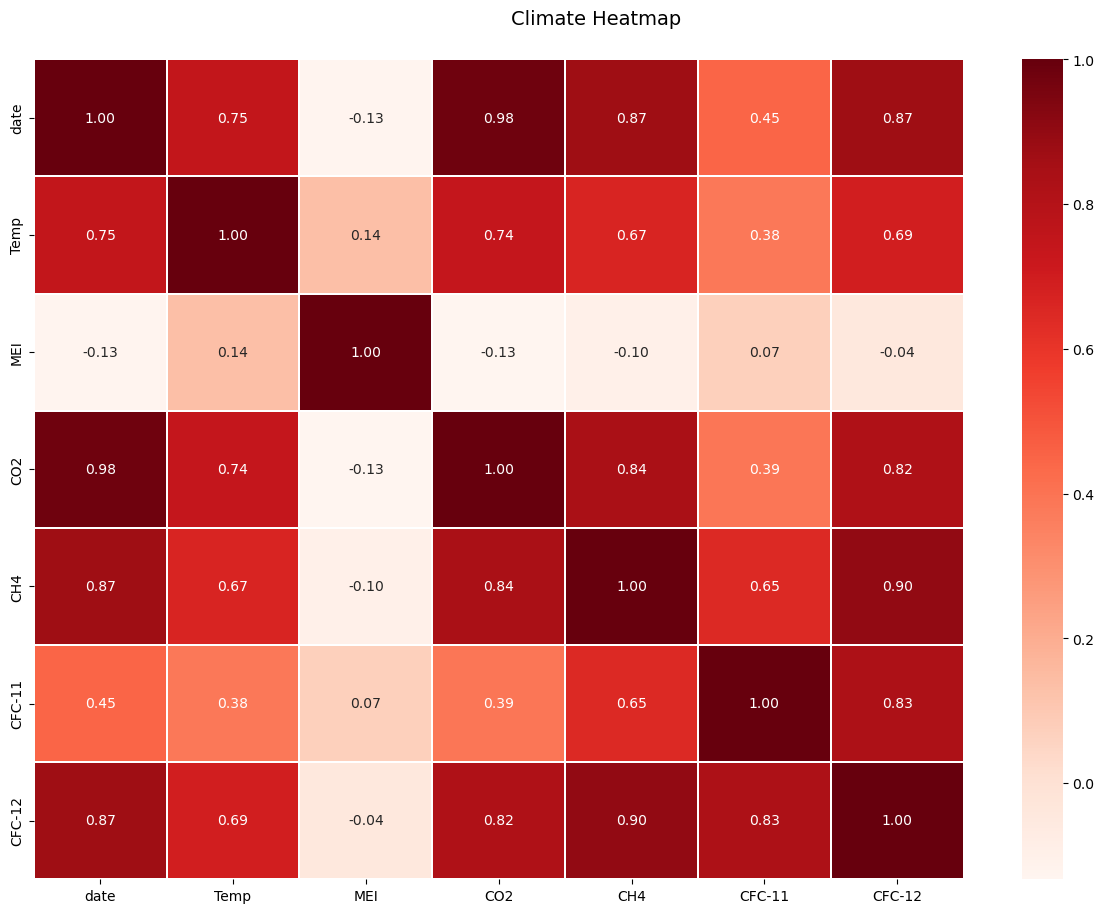

<Figure size 1280x960 with 0 Axes>

In [26]:
#Creating heatmap of correlation coefficients between relevant variables
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi = 200)

corrMatrix = df[["date","Temp","MEI","CO2","CH4","CFC-11","CFC-12"]].corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Reds", fmt='.2f', linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Climate Heatmap', fontsize=14)

We decided to use a heatmap to determine the correlation coefficients for our numerical variables. From the heatmap, we can see which variables have the strongest or weakest relationship with each other, and hence determine which bivariate relationships are worth investigating. 

We will be investigating Date vs Temperature (the main objective of this dataset), those with particularly large correlation coefficients (>= 0.85), and others that we can potentially draw insights from.

### **Temp and Date**

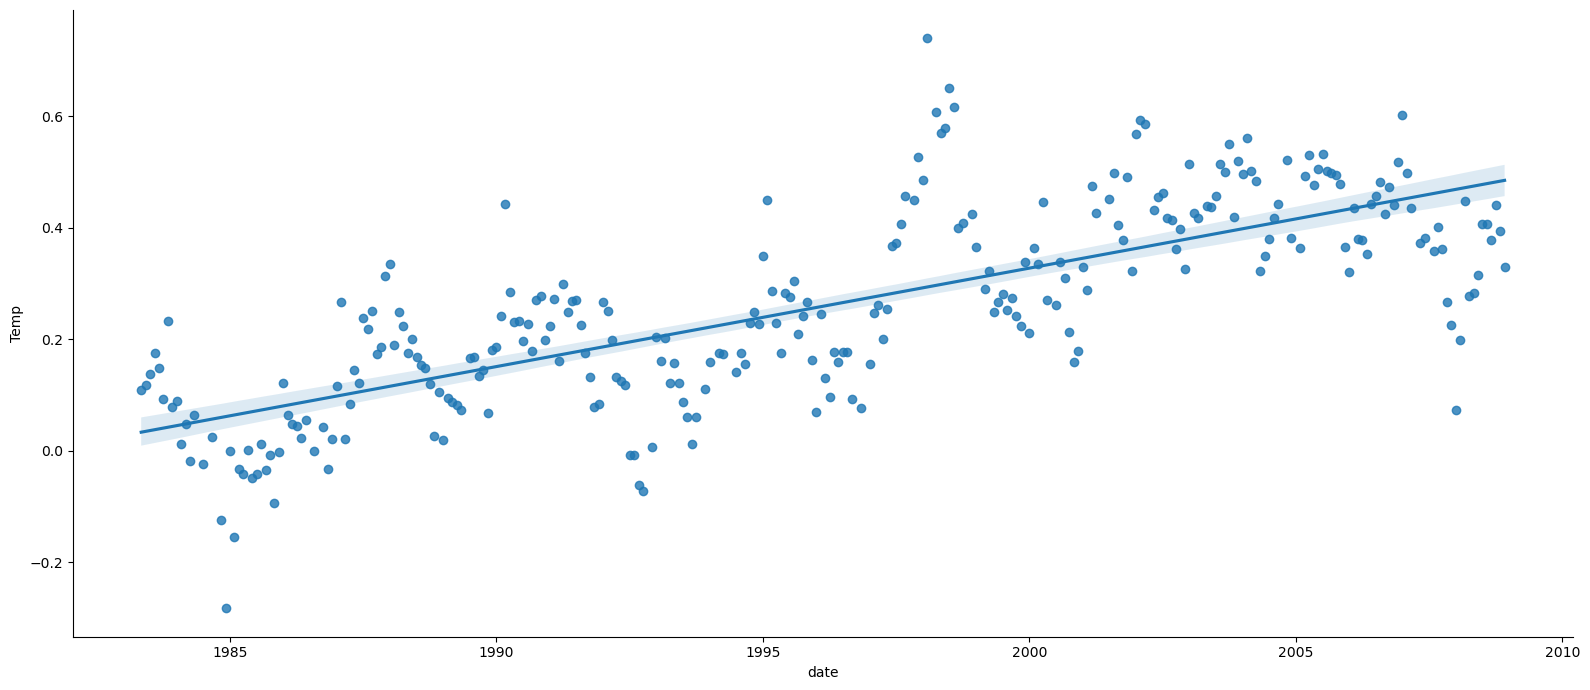

In [27]:
sns.lmplot(data=df, y='Temp', x='date', height = 7, aspect = 16/7)

The correlation coefficient between Date and Temperature is 0.75. Generally, temperature has been increasing from 1983 to 2008. 

### **CO2 and Date**

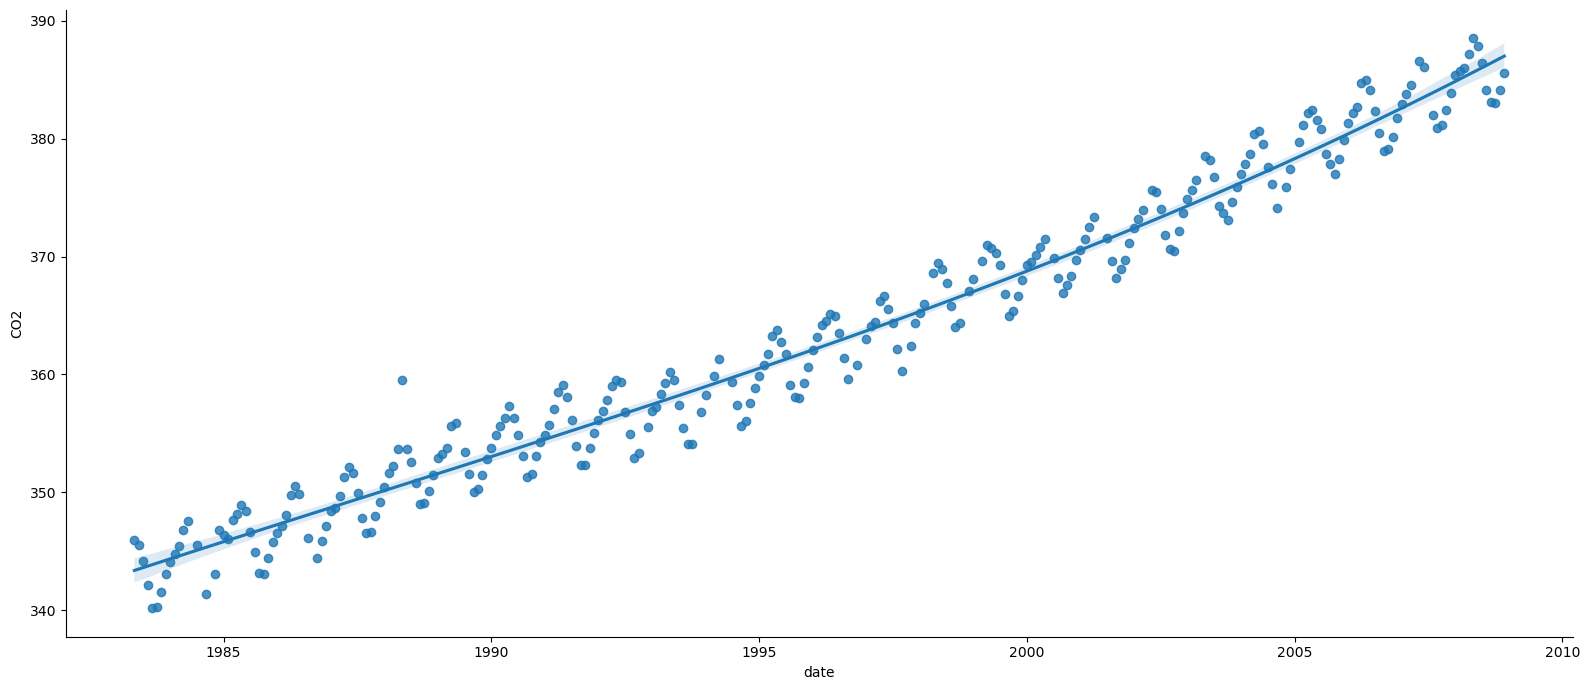

In [28]:
sns.lmplot(data=df, y='CO2', x='date', height = 7, aspect = 16/7, order = 3)

The correlation coefficient between date and CO2 is 0.98. The data presented shows that CO2 increases somewhat linearly over time. Human activity has increased since 1985, this includes the  burning of
fossil fuels such as coal and oil, which combines carbon with oxygen in the air, forming CO2 in the process. With the increasing
global population, human activities show no sign of decreasing, hence CO2 levels continues to increase over time.


### **CH4 and Date**

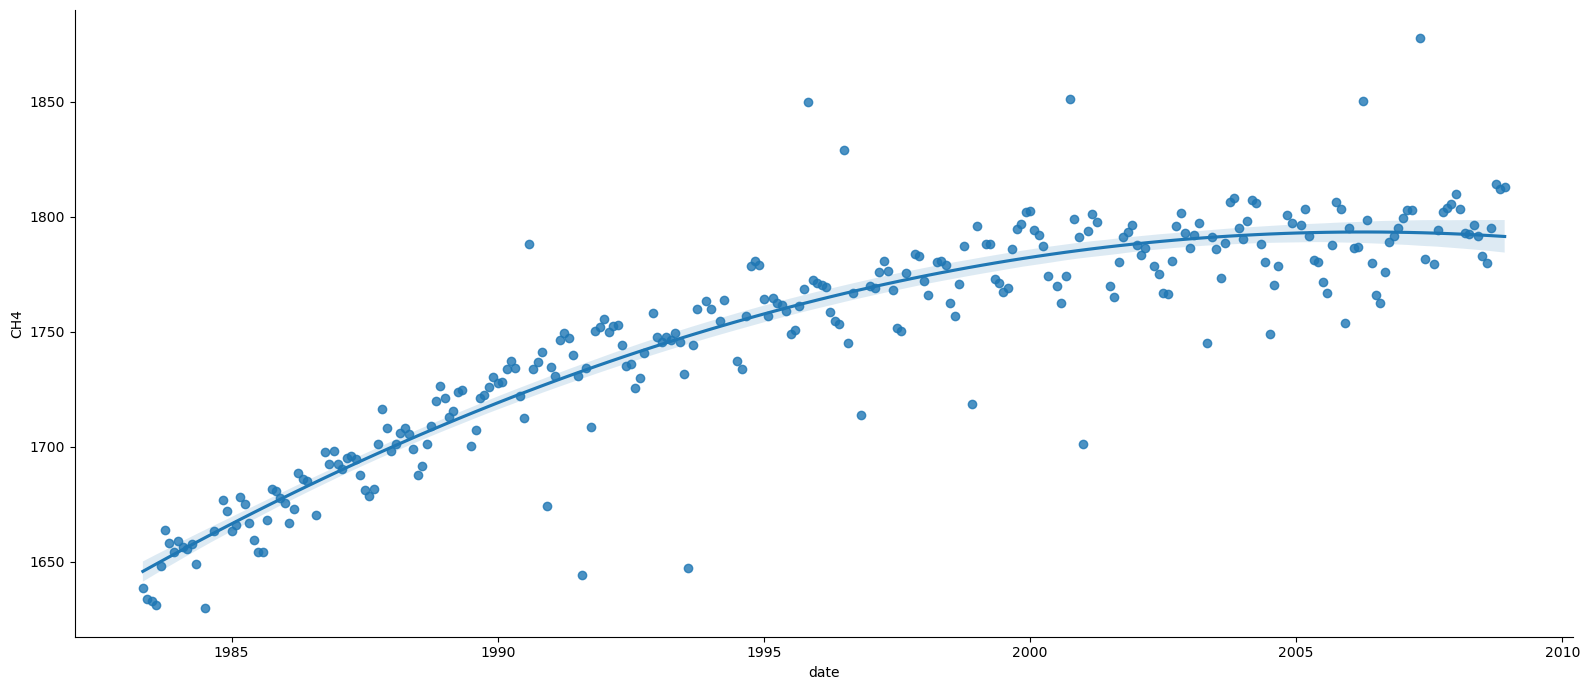

In [29]:
sns.lmplot(data=df, y='CH4', x='date', height = 7, order = 2, aspect = 16/7)

The correlation coefficient between date and CH4 is 0.87. The data shows that the relationship between date and CH4 folows a logarithmic curve, with the levels of CH4 becoming stagnant 
as it approaches 2010. Upon further research, we found that CH4 has a much shorter atmospheric lifetime than CO2(taking around 12 
years to decompose, compared to centuries taken for CO2), hence the growth of CH4 over time seems to have stagnated.

### **CFC-12 and Date**

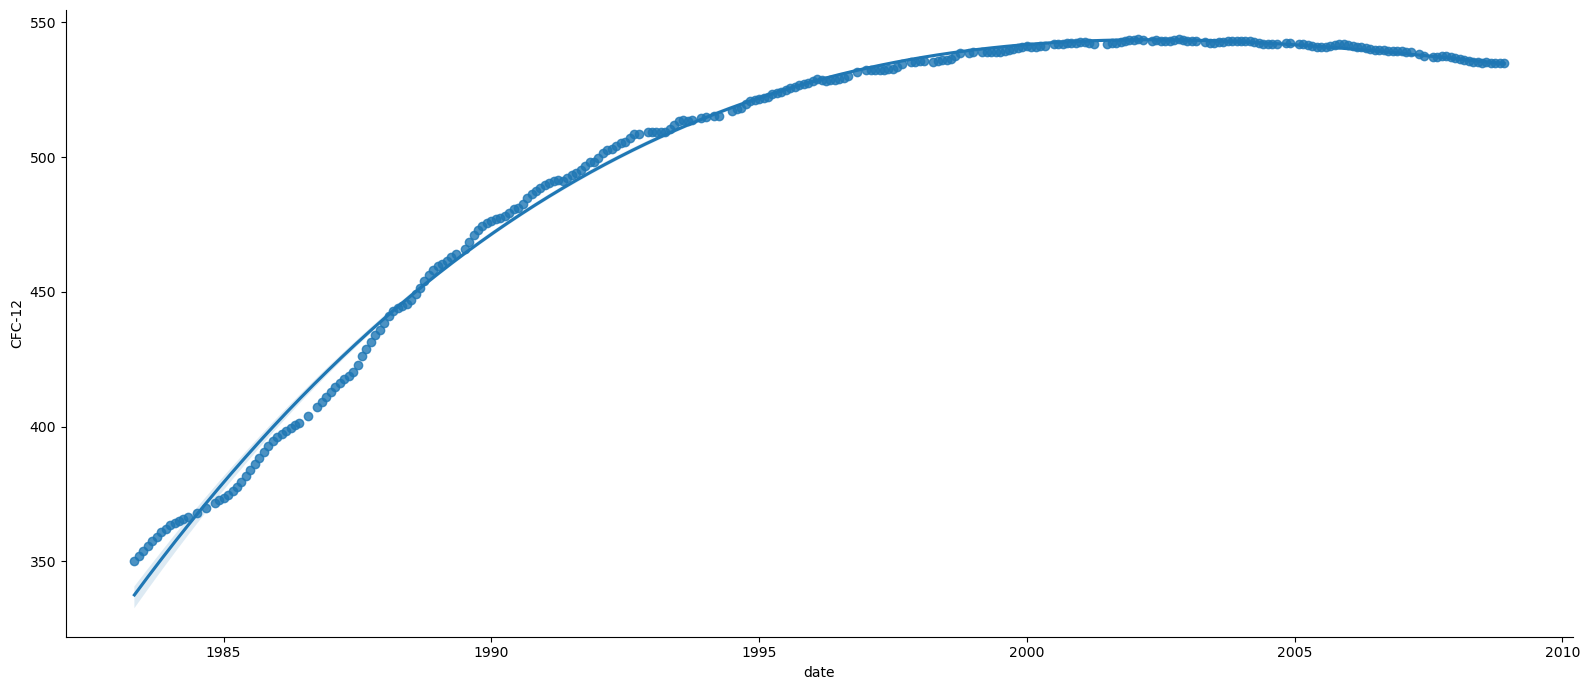

In [30]:
sns.lmplot(data=df, y='CFC-12', x='date', height = 7, order = 3, aspect = 16/7)

The relation between date and CFC-12 strongly follows a curve. Similarly to CH4, the rate of increase of CFC-12 has been decreasing over time from 1983 to 2008. We attribute this fall in rate to climate movements aimed at reducing the production of CFC-12.

### **Temp and MEI**

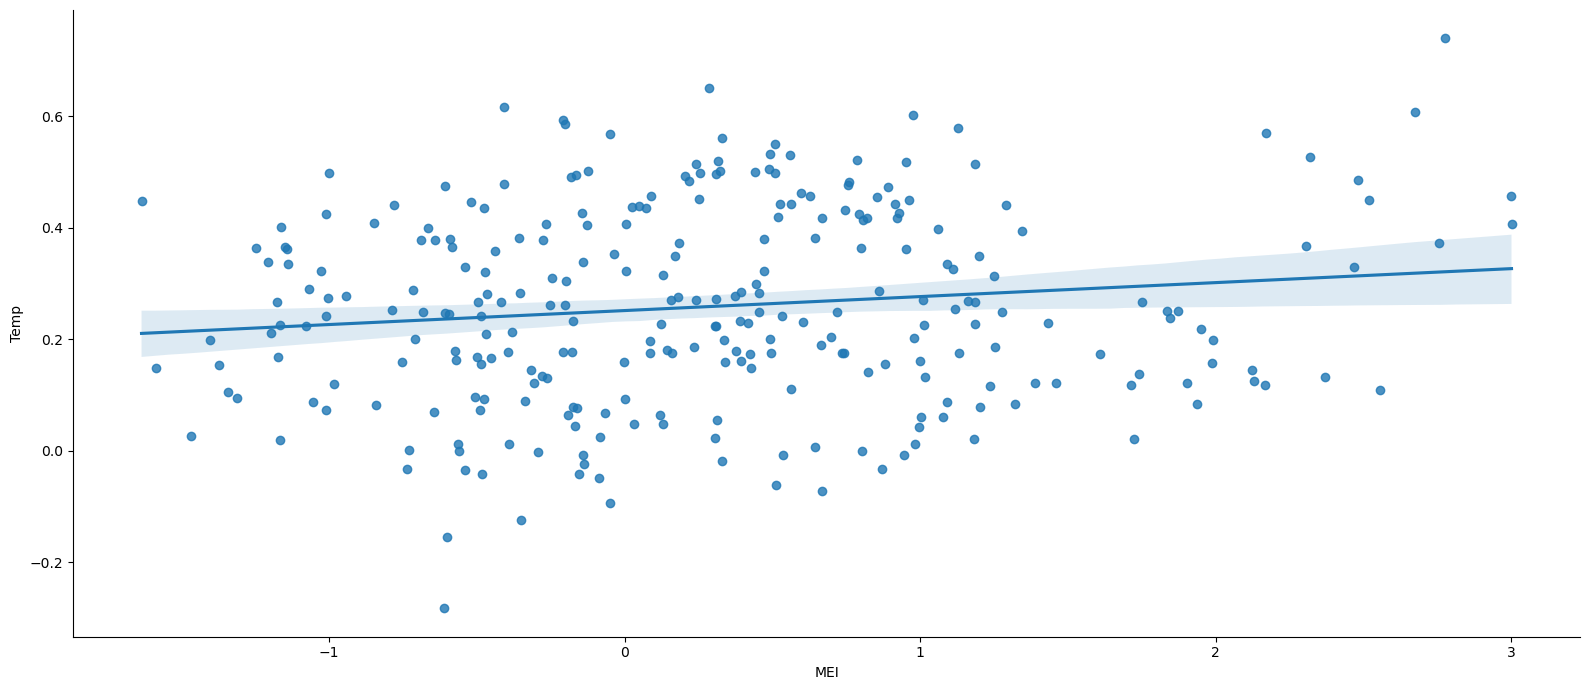

In [31]:
sns.lmplot(data=df, y='Temp', x='MEI', height = 7, aspect = 16/7)

The correlation coefficient between MEI and Temperature is 0.14. It appears that MEI has a weaker correlation to temperature as compared to other factors such as CO2 and CH4. However, this can be attributed to various other factors, such as the location where the reference value was taken. 

### **CH4 and CO2**

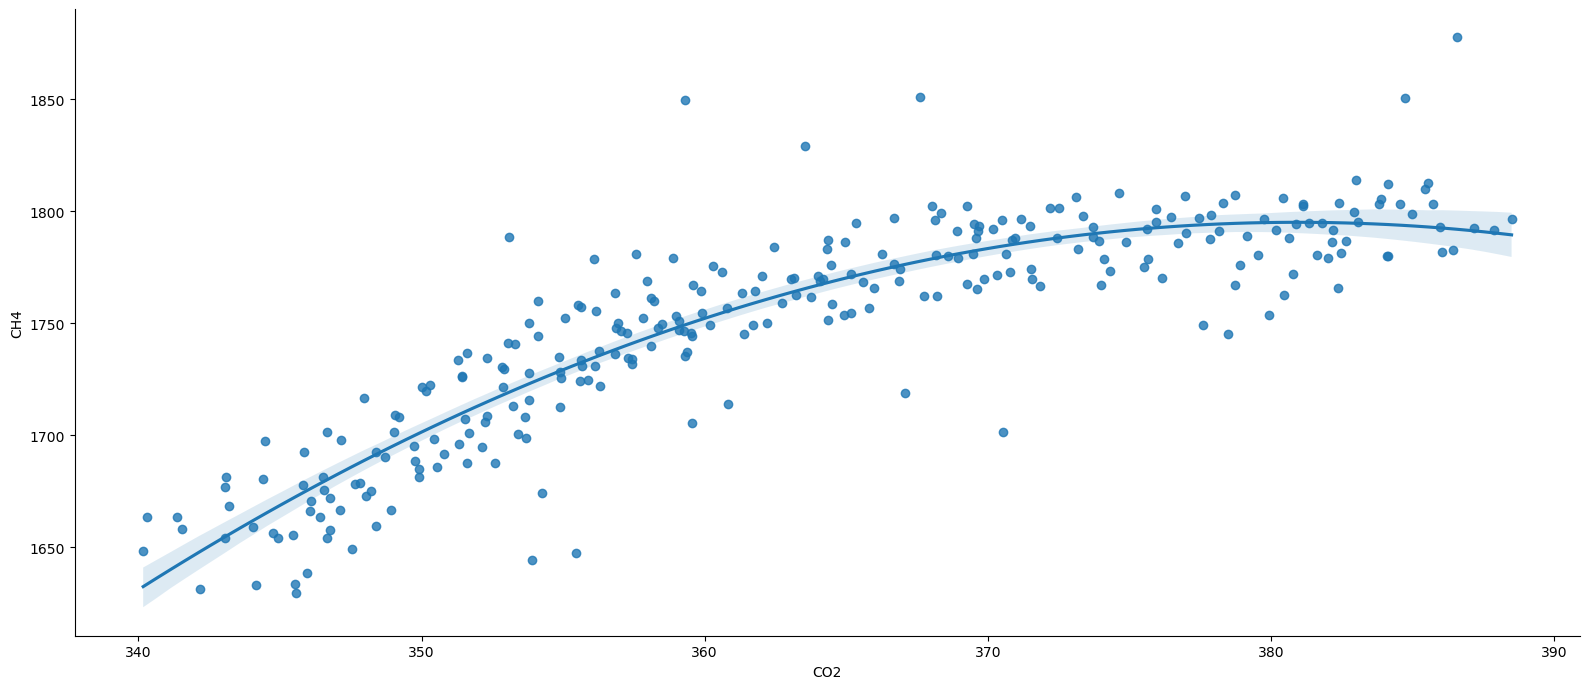

In [32]:
sns.lmplot(data=df, y='CH4', x='CO2', height = 7, aspect = 16/7, order = 2)

The correlation coefficient between CO2 and CH4 is 0.84. 
As the increase in both CO2 and CH4 are directly linked to the increase in human activity, the levels of CO2 and CH4 in the atmosphere seem to be correlated to each other.

### **CH4 and CFC-12**

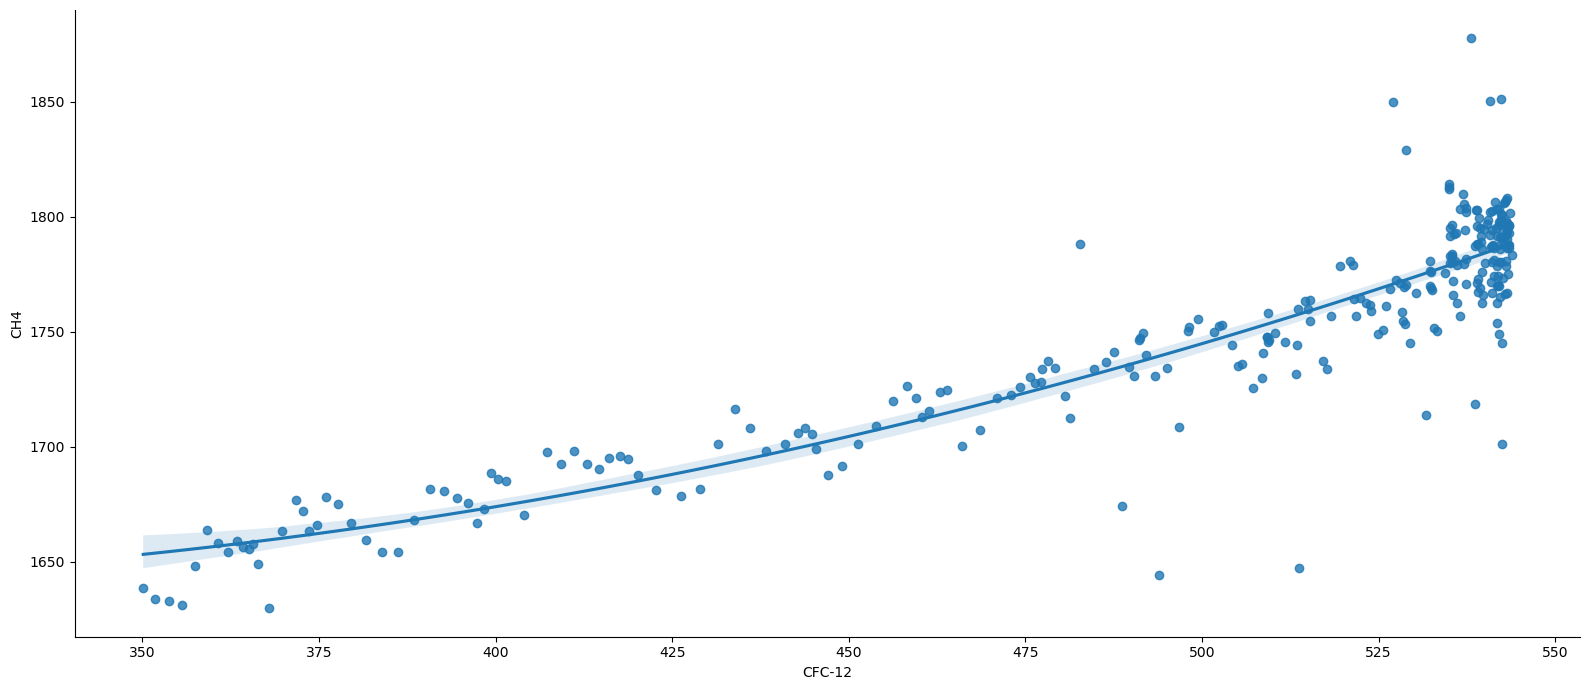

In [33]:
sns.lmplot(data=df, y='CH4', x='CFC-12', height = 7, aspect = 16/7, order = 2) 

The correlation coefficient between CFC-12 vs CH4 is 0.90. 
The relationship between CH4 and CFC-12 is linear. If there is a high level of CH4, there is likely also a high level of CFC-12. As mentioned earlier for the relationship of CO2 and CH4, the increase in such gases is likely due to the increase in human activity that produces greenhouses gases.

## Part II: Modeling [12% of final grade]


In [34]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Response.** 

Regression: We want to predict the value of temperature, based on potentially explanatory variables such as MEI, CO2, CH4, CFC11 and CFC12.

Classification: We want to predict the future class of aerosols based on the variables related to gases such as MEI, CO2 and CH4. 

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Response.** 

We will investigate the regression problem, as there are more columns of data available for our model to be trained on.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

**Response.** 

We are predicting the dependent variable Temperature, in order to forecast the changes in Temperature over time.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

**Response.** 

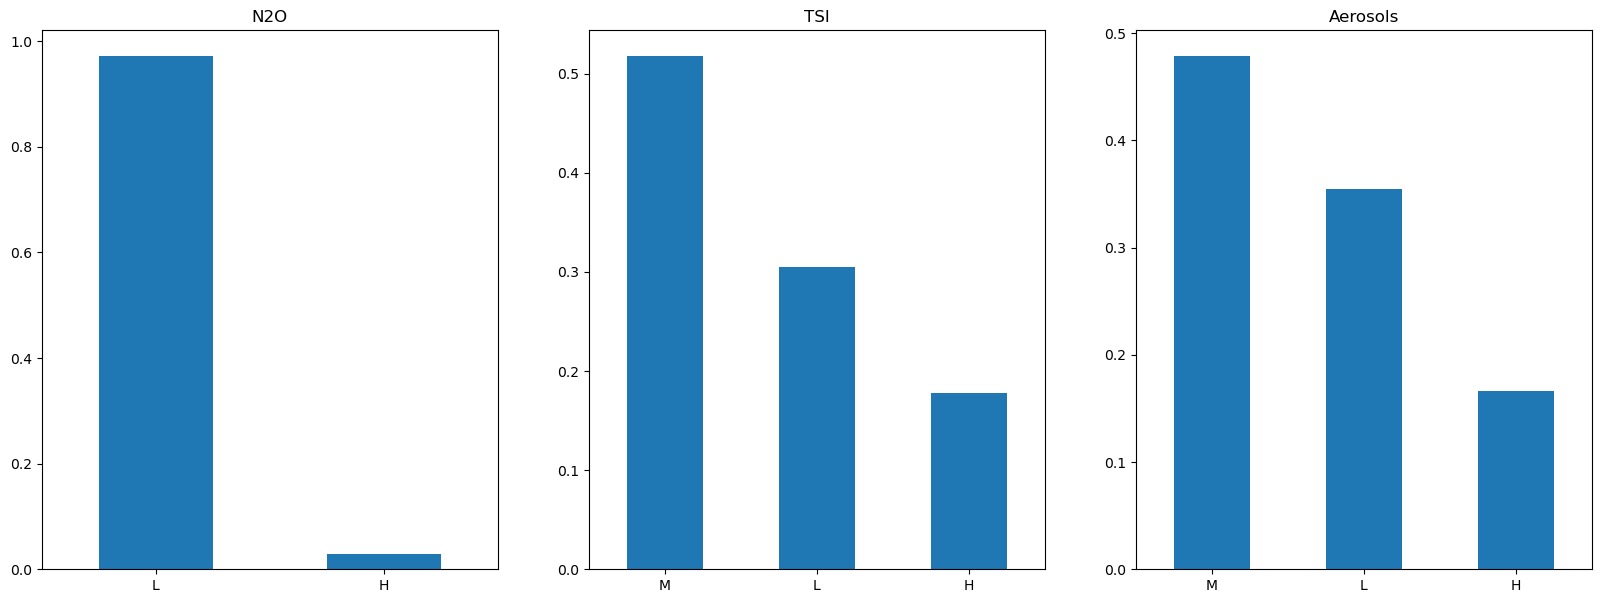

In [35]:
# Exploring the distribution of categorical variables using bar graphs
datatypes = df.dtypes
categorical_features = datatypes[datatypes=="object"].index

n = len(categorical_features)

r, c = 1, n
plt.subplots(r, c, figsize=(20,7))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[feature].value_counts(normalize=True).plot(kind='bar')
    ax.tick_params('x', labelrotation = 0)

plt.show()

From the bar graphs above, we can observe that N2O has a clear mode and a dominant value, whereas TSI and Aerosols are more evenly distributed and do not have a distinct mode. 

The lack of variation in N2O means that it is likely to have little explanatory power on the variation in Temperature, hence we will drop it. 

The critieria we use is that we will not select features where the  mode has a frequency of more than 60%, therefore, we will select TSI and Aerosols.

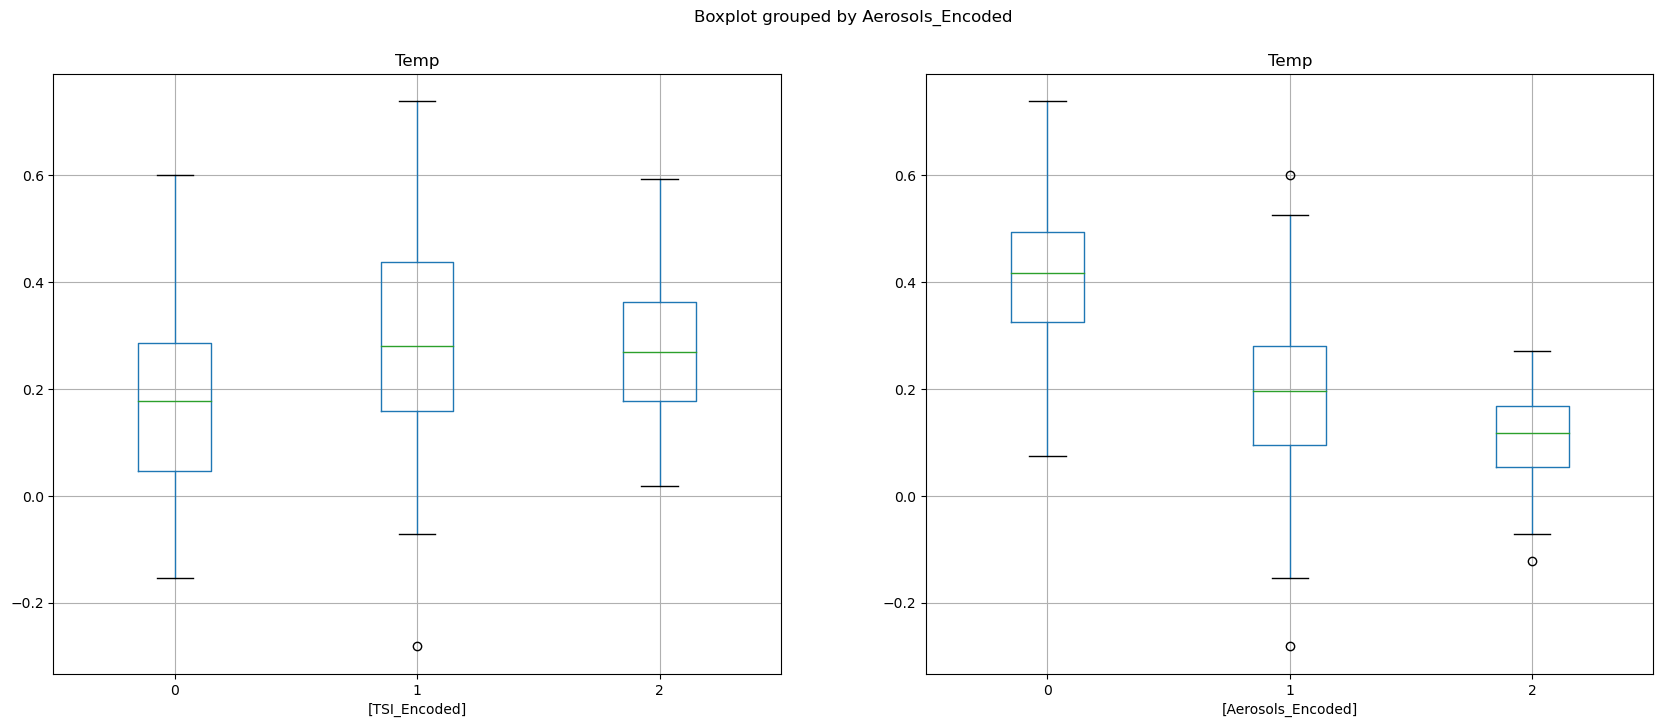

In [36]:
# Exploring how Temperature is related to TSI and Aerosols

categorical_important = ["TSI_Encoded", "Aerosols_Encoded"]
n = len(categorical_important)

r, c = 1, n
plt.subplots(r, c, figsize=(20,8))

for i in range(n):
    feature = categorical_important[i]
    ax = plt.subplot(r,c,i+1)
    df[[feature,'Temp']].boxplot(by=feature, ax=ax, rot=90)
    ax.tick_params('x', labelrotation = 0)

From visual observation, we noted the following:


*   For Aerosols, those with Aerosol value of 'L' have a higher temperature than those with 'M' which in turn have higher temperature than those with 'H'. There is a distinct relationship where the higher the number of Aerosols, the lower the temperature.
*   The value of TSI does not appear to have a relationship with Temperature

We opt to keep Aerosols, and use the encoded value in our model training. 

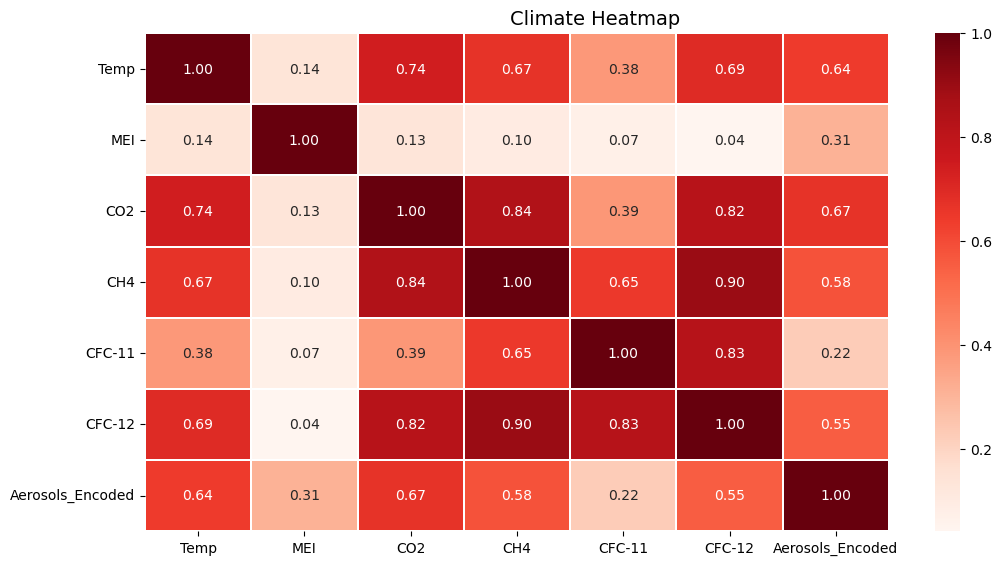

In [37]:
#Creating heatmap of correlation coefficients between Temp and relevant variables
fig, ax = plt.subplots(figsize=(12, 6))

corrMatrix = abs(df[["Temp","MEI","CO2","CH4","CFC-11","CFC-12", "Aerosols_Encoded"]].corr())
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Reds", fmt='.2f', linewidths=.05)

fig.subplots_adjust(top=0.94)

t = fig.suptitle('Climate Heatmap', fontsize=14)

In [38]:
# given a dataframe df, and a target variable and threshold
# return all columns in df which are 'highly' correlated to target
# definition of 'high' correlated given by parameter threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = ["date", "Temp","MEI","CO2","CH4","CFC-11","CFC-12", "Aerosols_Encoded"]
features_selected = corr_features(df[features_selected], 'Temp', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['date', 'CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']


We generate a heatmap with the absolute value of correlation coefficients between two variables. From the heatmap, we can observe that there are many variables that are closely related to Temperature. Using the function defined above, we retrieve these closely related variables using the threshold of 0.5.  

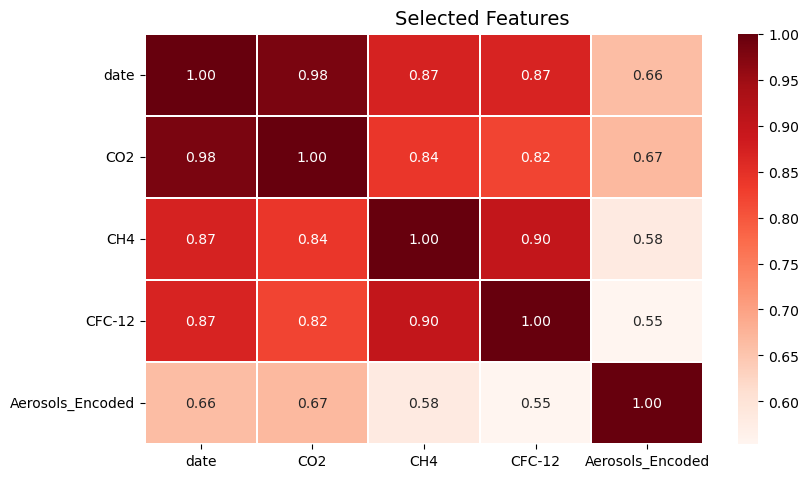

In [39]:
#Creating heatmap of correlation coefficients between relevant variables
fig, ax = plt.subplots(figsize=(9, 5))

corrMatrix = abs(df[features_selected].corr())
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Reds", fmt='.2f', linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Selected Features', fontsize=14)

In [40]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features
    
features_selected = get_uncorr_features(df[features_selected], 0.92)
print(f"Final selected features : {features_selected}")

Final selected features : ['CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']


After selecting the features we shortlisted for our model training, we will now check that these features are not correlated to each other, as they would be redundant. We check this using the absolute value of the correlation coefficient.

However, from the heatmap, we observe that all the variables are closely correlated to one another. It appears inevitable that CO2, CH4, CFC-12 and Aerosols will increase at the same time.

We use a relatively high threshold to remove the features that are extremely correlated to one another (close to 1.00). Hence, we will remove the variable 'date' (r value of 0.98 with 'CO2'). 

We will keep the rest of the features to allow our model to have more data available to accurately predict the changes in temperature over time.

**b.** Split the dataset into train and test sets. Describe how you split step by step.

**Response.** 

In [41]:
X = df[["CO2", "CH4", "CFC-12", "Aerosols_Encoded"]]
y = df[["Temp"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4212)

We took a sample 75% of the dataset through random selection as the training set, and used the remaining 25% as the test set for our model.

X refers to the independent features we selected (CO2, CH4, CFC-12 and Aerosols_Encoded), whereas Y refers to the dependent variable Temp.

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

**Response.** 

#### 1. Ordinary Least Squares (Linear Regression)
Linear regression is a supervised machine learning algorithm that finds the best fit linear model with coefficients w = (w1, w2, ... wp) so that the residual sum of squares between the actual values and the values predicted by the model is minimal. 

#### 2. Ridge Regression
Ridge Regression is a regularized form of linear regression that implements L2 regularization in its model. We chose this model because it prevents data overfitting and because some of our independent variables are highly correlated to each other.

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

**Response.** 

In [42]:
# model fitting for linear regression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

Model 1: Linear Regression 
--------------------------
Features : ['CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']
Coefficients: [ 0.00450351 -0.00035616  0.00105371 -0.07038251]
Intercept : -1.225837701102218
Coeff of Determination : 0.5624767051823538


In [43]:
# model fitting for ridge regression

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model 2: Ridge Regression
-------------------------
Features : ['CO2', 'CH4', 'CFC-12', 'Aerosols_Encoded']
Coefficients: [ 0.00454539 -0.00035324  0.00105179 -0.06919112]
Intercept : -1.2461834471199786
Coeff of Determination : 0.5624641982138534


We performed the training for linear and ridge models, and the coefficients and intercepts are shown above.

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

**Response.** 

In [44]:
# Temperature = -1.226 + 0.00450(CO2) - 0.000356(CH4) + 0.00105(CFC-12) - 0.0704(Aerosols_Encoded)

# Linear Regression
y_pred_linear = model1.predict(X_test)

# Ridge Regression
y_pred_ridge = model2.predict(X_test)

y_pred_linear_flatten = y_pred_linear.ravel()
y_pred_ridge_flatten = y_pred_ridge.ravel()

data_dict = {'Linear' : y_pred_linear_flatten, 'Ridge' : y_pred_ridge_flatten}
regres_df = pd.DataFrame(data_dict)

regres_df

,Linear,Ridge
0,0.428868,0.428432
1,0.145182,0.144751
2,-0.025681,-0.025136
3,0.160719,0.160488
4,0.355513,0.356619
...,...,...
66,0.436733,0.436730
67,0.392684,0.392135
68,0.420487,0.420127
69,0.415936,0.415758


We applied the Linear Regression and Ridge Regression models to our test datasets, and the results are shown above. It appears that there are very minor differences between the two scores, and we will have to use evaluation metrics to determine the better model. 

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

**Response.** 

As both of our models are based on regression, we would be evaluating both models using two of the most common evaluation metrics for regression:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [45]:
## model 1 evaluation

# predict based on test set
y_pred = model1.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Temp"])
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("Model 1 Evaluation")
print("-----------------")
print(f"MAE: {mae:.50f}")
print(f"MAE as % of mean: {mae/ave*100:.5f}%")
print(f"RMSE: {rmse:.50f}")

Model 1 Evaluation
-----------------
MAE: 0.06741795102565584230092099460307508707046508789062
MAE as % of mean: 22.02795%
RMSE: 0.08467724251307984228986924790660850703716278076172


In [46]:
## model 2 evaluation

# predict based on test set
y_pred = model2.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Temp"])
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("Model 2 Evaluation")
print("-----------------")
print(f"MAE: {mae:.50f}")
print(f"MAE as % of mean: {mae/ave*100:.5f}%")
print(f"RMSE: {rmse:.50f}")

Model 2 Evaluation
-----------------
MAE: 0.06742328132737381019001787763045285828411579132080
MAE as % of mean: 22.02970%
RMSE: 0.08461965756640935087951049808907555416226387023926


**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.** 

We will choose the Linear Regression model to tackle our regression problem. Based on the metrics of MAE and RMSE, Linear Regression performed better with lower MAE and RMSE than that of Ridge Regression.

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.** 

Our model implies that temperature will increase over time and it is largely affected by the presence of greenhouse gases. It is consistent with intuition due to global warming, as well as the chart we plotted earlier in Part I. 

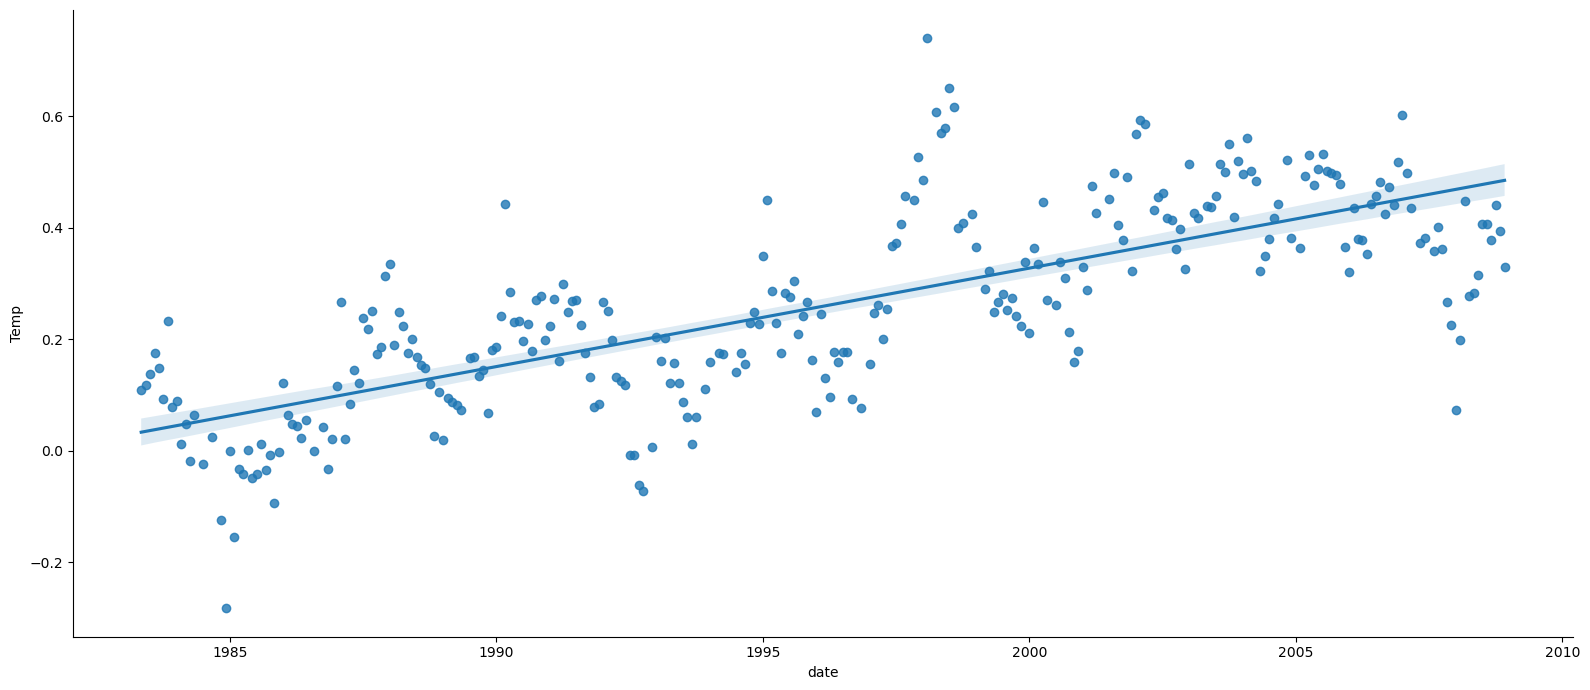

In [47]:
sns.lmplot(data=df, y='Temp', x='date', height = 7, aspect = 16/7)

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.** 

We learnt how to identify explanatory features to create a training model. However we realised that for regression, linear regression is not the best fit for all datasets. It appears that for our dataset, the temperature variable follows a curve. We should explore different options to find the best fit. 

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.** 

Zachary: Worked on visualisation of data as well as formatting code. Analysed  API documentation of several data science libraries to understand the functions used and which best to use for each case and raised insights regarding interpolation and understanding anomalies.

Calvin:  Helped in the implementation and testing of several critical components, writing of the code as well as making iterative improvements in chart visualisation and code efficiency. I was also involved in the planning and brainstorming stage, including generating ideas and analyzing them with my teammates for feedback and refinement.

Claire: Did research related to our dataset, wrote down insights from our analysis and made sure that it correlates to real life. Also provided suggestions during group meetings regarding ways to group and present the data.

Benedict: Arranged group meetings and led discussions during these meetings. Also helped in testing and implementing the code above, in particular making sure that our code is useful and targeted towards the requirements and goal of the project.

Grace: Involved in summarizing and analyzing the different variables of the dataset, making the code implementation for data visualization and charting and making sure that the data visualization looks clean, as well as providing several explanations for different sections of the document.

**b.** List any references and sources you have cited.

**Response.** 

IEA (2021), Methane Tracker 2021, IEA, Paris https://www.iea.org/reports/methane-tracker-2021, License: CC BY 4.0
NASA. (2023, March 2). The causes of climate change. NASA. Retrieved March 30, 2023, from https://climate.nasa.gov/causes/#:~:text=Human%20Activity%20Is%20the%20Cause,air%20to%20make%20CO2. 